# Introduction to Data Science
## Homework 5

Student Name: Trevor Mitchell

Student Netid: tim225
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!

Laplace smoothing is useful when it comes to the naive Bayes classifier, because if there are only a a few instances (documents) that are being used to calculate the probability that each piece of evidence (feature) occuring within a given class, these few instances could be extremes and skew from a more accurate probability estimate of the true data set. Laplace smoothing essentially is a regularization method that reduces sensitivities to these outliers that could skew probability results. It also adjusts probabilities for scenarios where it is zero. This would prevent a feature that perhaps was not seen in this specific sample, but is present in the greater data set from having zero probability. While a model built without Laplace smoothing will work well on the training set, it will not perform well on the testing set because the data sampled is not an accurate representation of the data distribution at large. Laplace smoothing reduces overfitting which essentially increases bias because the model will not fit as close to the training data. However, at the same time it will reduce variance since the model is now more general. Hence, why outliers won't effect probabilities as strongly.

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [2]:
import pandas as pd
data = pd.read_csv('imdb.csv')

2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
# Code here
data['Class'].loc[data['Class'] == 'N'] = 0
data['Class'].loc[data['Class'] == 'P'] = 1
data.dropna(subset=['Class'], inplace = True)

3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [4]:
#Code here
X = pd.DataFrame(data['Text'])
Y = pd.DataFrame(data['Class'])

train_data = data.sample(frac=0.75)
test_data = data.loc[~data.index.isin(train_data.index)]

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
                                    
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2),stop_words='english')
count_vectorizer_model = vectorizer.fit_transform(train_data['Text'].values)                                    
cnt_vect_test = vectorizer.transform(test_data['Text'].values).toarray()

tfid_vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 2),stop_words='english')
tfid_vectorizer_model = tfid_vectorizer.fit_transform(train_data['Text'].values)
tfid_vect_train = tfid_vectorizer.transform(train_data['Text'].values)
tfid_vect_test = tfid_vectorizer.transform(test_data['Text'].values)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [6]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

0.9406825458417716

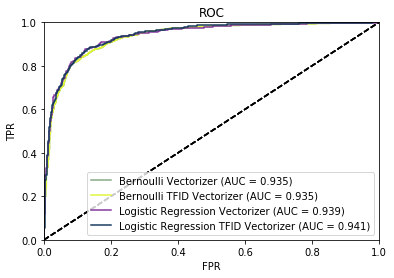

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import numpy as np
from sklearn.metrics import roc_curve, auc

# Code here

def BernoulliModel(X,x_test):
    Ber = BernoulliNB()
    target = np.array(train_data['Class'].values)
    target = target.astype('int')
    Ber.fit(X=X,y=target)
    return Ber.predict_proba(x_test)[:,1]

def LogisticRegressionModel(X,x_test): 
    LogR= LogisticRegression()
    target = np.array(train_data['Class'].values)
    target = target.astype('int')
    LogR.fit(X=X,y=target)
    return LogR.predict_proba(x_test)[:,1]

def plotUnivariateROC(preds, truth, label_string):

    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    # #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    
    #plt.figure(figsize=(20,5))

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

ber_pred = BernoulliModel(count_vectorizer_model,cnt_vect_test)
ber_pred_tfid = BernoulliModel(tfid_vectorizer_model,tfid_vect_test)
lr_pred = LogisticRegressionModel(count_vectorizer_model,cnt_vect_test)
lr_pred_tfid = LogisticRegressionModel(tfid_vectorizer_model,tfid_vect_test)
target = np.array(test_data['Class'].values)
target = target.astype('int')
plotUnivariateROC(ber_pred, target, 'Bernoulli Vectorizer')
plotUnivariateROC(ber_pred_tfid,target,'Bernoulli TFID Vectorizer')
plotUnivariateROC(lr_pred,target,'Logistic Regression Vectorizer')
plotUnivariateROC(lr_pred_tfid,target,'Logistic Regression TFID Vectorizer')

Explanation here!
Logistic Regression TFID Vectorizer model did the best at predicting the rating of the test data. This model may have performed the best because the tfid vectorizer add different weights to the features.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [31]:
# Code here to display 5 incorrect reviews.

LogR= LogisticRegression()
target = np.array(train_data['Class'].values)
target = target.astype('int')
LogR.fit(X=tfid_vectorizer_model,y=target)
Prediction = LogR.predict(tfid_vect_test)
test_data['Prediction'] = Prediction
Incorrect_Predictions = test_data.loc[test_data['Prediction'] != test_data['Class']]
five_wrong = Incorrect_Predictions.loc[(Incorrect_Predictions.Text.str.len()) < 170]
# five_wrong
# five_wrong['Text'].values
pd.set_option('display.max_colwidth', -1)
five_wrong

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Text,Class,Prediction
770,'Go Igor go you are the proof that Slovenian films may should and must be different. Theres soul in it and this is rare. Dont let anybody put you down!',1,0
4510,'If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie hell even my mom liked it. Great Camp!!!',1,0
5072,'I was overtaken by the emotion. Unforgettable rendering of a wartime story which is unknown to most people. The performances were faultless and outstanding.',1,0
5853,'I think its one of the greatest movies which are ever made and Ive seen many... The book is better but its still a very good movie!',1,0
7058,'Great movie - especially the music - Etta James - At Last. This speaks volumes when you have finally found that special someone.',0,1


Explanation for the 5 reviews chosen here!

Logistic Regression Vectorizer mdoel did the best at predicting the rating of the test data.
1. For record 770, my model may have falsely predicted a negative sentiment because there does not appear to be any words that could have been associated with  a positive review when the model was being trained. However, the term "down" could have been why it was predicted as negative.
2. For record 4510, there seems to be a number of words that could've been assoicated with a positive review such as, "liked", "great", and "laughter" , but perhaps the term "hell" could have been associated with a negative sentiment and had a greater weight. Also, the bigram "If you" could've been associated with a lot of negative reviews that contained sarcasm which also could've had a greater weight
3. For Record, 5072 could've been associated with a negative review for similar reasons to record 4510. Perhaps terms like "unknown" and "overtaken" coul've been associated with negative reviews and had less weight as potential positive terms such as "outstanding" could've been less common.
4. For record  5853, perhaps the term "book" could have been associated with negative reviews and had greater weight than "greatest" which could have been a positive association. The reason being because perhaps in most reviews where the "book" is mentioned, the review is saying that the movie does not live up to expectations and is a negative review.
5. For record 7058, the prediction could have been wrong, because there was a mistake in the dataset for this record. In this case, I actually agree with the model that this review is a positive sentiment, however, the dataset has it marked as negative.